http://machinelearninguru.com/deep_learning/data_preparation/hdf5/hdf5.html

In [1]:
from kt_utils import prep_data, create_dataset, load_dataset

# to rename images
import os
import PIL
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from keras.models import load_model
import cv2

from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
# import pydot
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')

%matplotlib inline

C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### rename all files in folder with a name that indicates, which class each file belongs to. Nicht wirklich mehr notwendig, da unsere App die Fotos direkt mit 0 bzw. 1

In [ ]:
def rename(path, label, i = 1):
    '''
    benennt die Fotos im Ordner um
    Argumente:
        path: Pfad zum Order, in dem die umzubenennenden Fotos liegen
        label: 'pos' oder 'neg', je nachdem, wie die Fotos umbenannt werden sollen
        i: Laufvariable zur Benennung der Fotos, kann angepasst werden, falls man einem Datenset Fotos hinzufügen
            möchte (dann i = "höchster Wert" +1)
    '''
    files = os.listdir(path)
    if label == 'pos':
        for file in files:
            os.rename(os.path.join(path, file), os.path.join(path + 'pos.' + str(i)+'.png'))
            i = i+1
    if label == 'neg':    
        for file in files:
            os.rename(os.path.join(path, file), os.path.join(path + 'neg.' + str(i)+'.png'))
            i = i+1
            
    print ('das nächste Bild würde Nummer ' + str(i) + ' sein')

In [ ]:
pos_path = 'C:/Users/JansPC/Desktop/test/pos/secBatch/'
neg_path = 'C:/Users/JansPC/Desktop/test/neg/'

#rename(pos_path, label = 'pos')
#rename(neg_path, label = 'neg')

### create HDF with empty arrays and labels in preparation for loading the images into it

In [2]:
input_path = 'C:/Users/JansPC/Desktop/test/train/*.png'
#input_path = 'C:/Users/JansPC/Dropbox/9. Semester/Weinseminar/Coursera/wineModel/datasets/train/*.jpg'
# Anteile von train/val/test-set hier angeben. Derzeit wird allerdings nur Train/Test-set genutzt, der Wert von 
# val_set hat keine Auswirkung
dataSplit = {
    'train_split': 0.8,
    'val_split': 0,
    'test_split': 0.2
}

train_addrs, train_labels, test_addrs, test_labels = prep_data(input_path, dataSplit, shuffle_data = True)

In [3]:
output_train_path = 'C:/Users/JansPC/Dropbox/9. Semester/Weinseminar/Coursera/wineModel/datasets/train_dataset.hdf5'
output_test_path = 'C:/Users/JansPC/Dropbox/9. Semester/Weinseminar/Coursera/wineModel/datasets/test_dataset.hdf5'

pixel = 112
hdf5_train_file, hdf5_test_file = create_dataset(train_addrs, train_labels, test_addrs, test_labels, output_train_path, output_test_path, px = pixel, data_order = 'tf')

### Load images and save them in prepared dataset

In [4]:
# a numpy array to save the mean of the images
#mean = np.zeros(train_shape[1:], np.float32)

# loop over train addresses
for i in range(len(train_addrs)):
    # print how many images are saved every 1000 images
    if i % 1000 == 0 and i > 1:
        print ('Train data: {}/{}'.format(i, len(train_addrs)))

    # read an image and resize to (128, 128)
    # cv2 load images as BGR, convert it to RGB
    addr = train_addrs[i]
    img = cv2.imread(addr)
    img = cv2.resize(img, (pixel, pixel), interpolation=cv2.INTER_CUBIC)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # add any image pre-processing here

    # if the data order is Theano, axis orders should change
    #if data_order == 'th':
    #    img = np.rollaxis(img, 2)

    # save the image and calculate the mean so far
    hdf5_train_file["train_set_x"][i, ...] = img[None]
    #mean += img / float(len(train_labels))
'''
# loop1 over validation addresses
for i in range(len(val_addrs)):
    # print how many images are saved every 1000 images
    if i % 1000 == 0 and i > 1:
        print 'Validation data: {}/{}'.format(i, len(val_addrs))

    # read an image and resize to (pixel, pixel)
    # cv2 load images as BGR, convert it to RGB
    addr = val_addrs[i]
    img = cv2.imread(addr)
    img = cv2.resize(img, (pixel, pixel), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # add any image pre-processing here

    # if the data order is Theano, axis orders should change
    if data_order == 'th':
        img = np.rollaxis(img, 2)

    # save the image
    hdf5_file["val_img"][i, ...] = img[None]
'''
# save the mean and close the hdf5 file
#hdf5_file["train_mean"][...] = mean
hdf5_train_file.close()

Train data: 1000/1019


In [5]:
# loop over test addresses
for i in range(len(test_addrs)):
    # print how many images are saved every 1000 images
    if i % 1000 == 0 and i > 1:
        print ('Test data: {}/{}'.format(i, len(test_addrs)))

    # read an image and resize to (128, 128)
    # cv2 load images as BGR, convert it to RGB
    addr = test_addrs[i]
    img = cv2.imread(addr)
    img = cv2.resize(img, (pixel, pixel), interpolation=cv2.INTER_CUBIC)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # add any image pre-processing here

    # if the data order is Theano, axis orders should change
    #if data_order == 'th':
    #    img = np.rollaxis(img, 2)

    # save the image
    hdf5_test_file["test_set_x"][i, ...] = img[None]

# save the mean and close the hdf5 file
#hdf5_file["train_mean"][...] = mean
hdf5_test_file.close()

In [6]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
#print ("classes: " + str(classes))

number of training examples = 1019
number of test examples = 255
X_train shape: (1019, 112, 112, 3)
Y_train shape: (1019, 2)
X_test shape: (255, 112, 112, 3)
Y_test shape: (255, 2)


y = [0 0]


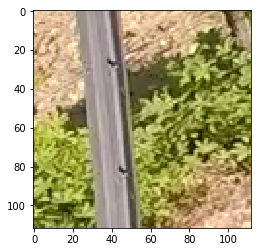

In [7]:
# Example of a picture
index = 234
plt.imshow(cv2.cvtColor(X_train_orig[index], cv2.COLOR_BGR2RGB))
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

### create Keras model

In [30]:
def wineModel(input_shape):
    """
    Implementation of the wineModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(24, (5, 5), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)    
    X = Activation('relu')(X)
    X = Dropout(0.2)(X)
    
    X = MaxPooling2D((2, 2), name='max_pool')(X)    

    
    # second layer added by me
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = Dropout(0.2)(X)
    
    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool1')(X)
    
#     X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv2')(X)
#     X = BatchNormalization(axis = 3, name = 'bn2')(X)
#     X = Activation('relu')(X)
#     X = Dropout(0.2)(X)
    
    # MAXPOOL
    #X = MaxPooling2D((2, 2), name='max_pool2')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    #X = Dense(1, activation='sigmoid', name='fc')(X)
    X = Dense(2, activation='softmax', name = 'fc')(X)
    #X = Activation('relu')(X)
    
    #X = Dense(1, activation='sigmoid', name='fc3')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='WineModel')
    
    return model

In [31]:
# input_shape must be same as pixel 
model = wineModel(input_shape = (112,112,3,))

### compile the model

In [37]:
# defaults for SGD: (lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
# defaults for Adam (from original paper): (lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) 
# metrics: mse, accuracy,...
# loss: categorical_crossentropy, binary_crossentropy
sgd = SGD(lr=0.001, momentum=0.2, decay=0.0, nesterov=False)
adam = Adam(lr=0.001)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])

### fit the model (training process)

In [38]:
# model.fit(x = ..., y = ..., epochs = ..., batch_size = ...)
history = model.fit(x= X_train, y = Y_train, epochs = 15, batch_size = 16)

Epoch 1/15
1019/1019 [==============================] - 84s 82ms/step - loss: 0.7187 - categorical_accuracy: 0.6909
Epoch 2/15
1019/1019 [==============================] - 73s 72ms/step - loss: 0.6392 - categorical_accuracy: 0.7164
Epoch 3/15
1019/1019 [==============================] - 81s 80ms/step - loss: 0.5986 - categorical_accuracy: 0.7242
Epoch 4/15
1019/1019 [==============================] - 80s 79ms/step - loss: 0.5384 - categorical_accuracy: 0.7498
Epoch 5/15
1019/1019 [==============================] - 74s 72ms/step - loss: 0.5387 - categorical_accuracy: 0.7341
Epoch 6/15
1019/1019 [==============================] - 75s 74ms/step - loss: 0.5157 - categorical_accuracy: 0.7399
Epoch 7/15
1019/1019 [==============================] - 80s 78ms/step - loss: 0.5338 - categorical_accuracy: 0.7419
Epoch 8/15
1019/1019 [==============================] - 80s 78ms/step - loss: 0.5044 - categorical_accuracy: 0.7439
Epoch 9/15
1019/1019 [==============================] - 79s 77ms/step - 

In [39]:
print (history.history.keys())

dict_keys(['loss', 'categorical_accuracy'])


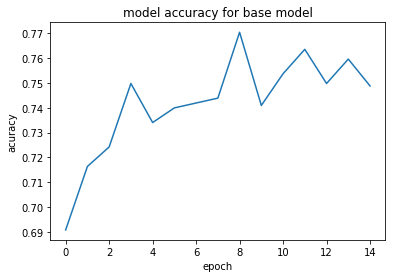

In [40]:
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.title('model accuracy for base model')
plt.ylabel('acuracy')
plt.xlabel('epoch')
plt.show()
# plt.savefig('learning_process_accuracy')

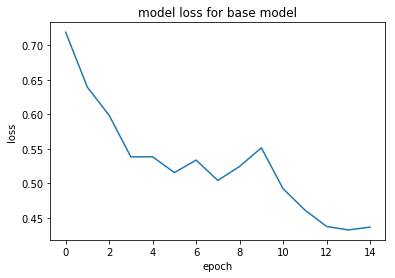

In [41]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss for base model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
# plt.savefig('learning_process_loss')

### Test the model on the testSet

In [21]:
#model.evaluate(x = ..., y = ...)
preds = model.evaluate(x = X_test, y = Y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

255/255 [==============================] - 7s 26ms/step

Loss = 1.177066637020485
Test Accuracy = 0.3960784297363431


In [42]:
# creates a HDF5 file with model parameters for later use
model.save('softmax_model.h5')  

### plot training process
http://www.codesofinterest.com/2017/03/graph-model-training-history-keras.html

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 112, 112, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 118, 118, 3)       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 114, 114, 24)      1824      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 114, 114, 24)      96        
_________________________________________________________________
activation_1 (Activation)    (None, 114, 114, 24)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 114, 114, 24)      0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 57, 57, 24)        0         
__________

### predict class of  image that the algorithm has never seen before
ich habe mal 10 neue Fotos erstellt, das Modell kann sie alle korrekt klassifizieren.

In [ ]:
# returns a compiled model
model = load_model('best_wineModel_1119_255_2Layer.h5')

In [ ]:
#img_path = 'C:/Users/JansPC/Dropbox/9. Semester/Weinseminar/Coursera/wineModel/datasets/test1/1019.jpg'
pics = [1, 2, 3, 4, 5, 6, 7, 9, 10]

for pic in pics:
    fig=plt.figure(figsize=(20,5))

    #Create one or more subplots using add_subplot, because you can't create blank figure
    fig.add_subplot(222)
    img_path = 'C:/Users/JansPC/Desktop/test/test/Untitled ' + str(pic) + '.png'
    img = image.load_img(img_path, target_size=(112, 112))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    print (x.shape)
    #plt.show()
    print(model.predict(x))
    imshow(img)
    
    
#with cv2
